<h1><center> MODEL MUSIMAN </center></h1><center>Laily Nissa A.M </center>

<center>
____________________________________________________________________________________________________________________________
</center>


Model musiman adalah model yang digunakan untuk memodelkan data-data dengan **perilaku berulang setiap periode waktu tertentu** seperti data bulanan, triwulan, harian, dan sebagainya.

Berikut contoh data musiman yaitu deret konsentrasi karbon dioksida $(CO_2)$ yang di ukur di Observatori Mauna Loa, Hawai untuk menginvestigasi perubahan atmosfer.

In [1]:
!pip install numpy==1.23.5
!pip install pmdarima

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.datasets import get_rdataset
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

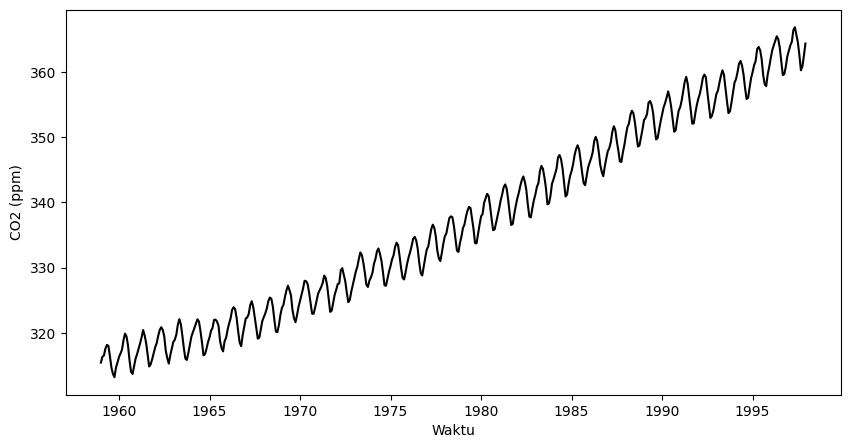

In [3]:
co2=get_rdataset('co2',package='datasets').data
plt.figure(figsize=(10,5))
plt.plot(co2.time, co2.value,'-k')
plt.xlabel('Waktu'), plt.ylabel('CO2 (ppm)')
plt.show()

Tampak adanya kecenderungan naik dan perilaku berulang (kecenderungan musiman) dalam deret tersebut. Kecenderungan musiman dapat dilihat dengan lebih jelas dengan menampilkan deret untuk beberapa tahun terakhir menggunakan simbol bulanan.

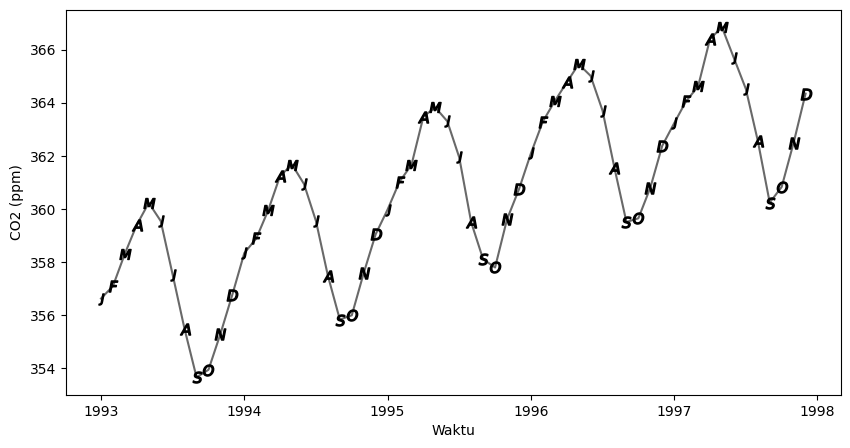

In [4]:
mapping={0:'$J$',1:'$F$',2:'$M$',3:'$A$',
         4:'$M$',5:'$J$',6:'$J$',7:'$A$',
         8:'$S$',9:'$O$',10:'$N$',11:'$D$'}
plt.figure(figsize=(10,5))
co2_new=co2[-60:].reset_index()
plt.plot(co2_new.time,co2_new.value, color='dimgray')
for i in range(len(co2_new)):
    plt.plot(co2_new.time[i], co2_new.value[i],
             marker=mapping[i%12],
             color='black', markersize=8)
plt.xlabel('Waktu'),plt.ylabel('CO2 (ppm)')
plt.show()

Dari gambar terlihat bahwa konsentrasi karbon dioksida tinggi pada bulan Maret, April, Mei, Juni, Juli dan rendah pada bulan Agustus, September, Oktober, November. Perilaku tersebut terus berulang dari tahun ke tahun.

Misalkan **$s$** menotasikan periode musiman yang diketahui, untuk deret bulanan maka 𝑠 = 12 sementara untuk deret triwulan 𝑠 = 4.

Didefinisikan model musiman **MA $(Q)$** untuk order **$Q$** dengan periode musiman **$s$** sebagai berikut:

<center> $Y_t=e_t-\Theta_1e_{t-s}-\Theta_2e_{t-2s}-...-\Theta_Qe_{t-Qs}$ </center>

Perhatikan bahwa model MA $(Q)$ musiman dapat dipandang sebagai kasus khusus dari model MA bukan musiman dengan order $q=Qs$ tetapi dengan koefisien $\theta$ semuanya bernilai nol kecuali pada lag-lag musiman $s, 2s, 3s,...,Qs$. Dapat ditunjukkan bahwa fungsi autokorelasi bernilai nol kecuali pada lag-lag musiman $s, 2s, 3s,..., Qs$ (lihat Cryer and Chan, 2008).

Model autoregressive musiman **AR $(P)$** untuk order **$P$** dengan periode musiman **$s$** juga dapat didefinisikan sebagai berikut:

<center> $Y_t=\Phi_1Y_{t-s}+\Phi_2Y_{t-2s}+...+\Phi_PY_{t-Ps}+e_t$ </center>

Model AR $(P)$ musiman dapat dipandang sebagai kasus khusus dari model AR bukan musiman dengan order $p=Ps$ tetapi dengan koefisien $\phi$ semuanya bernilai nol kecuali pada lag-lag musiman $s, 2s, 3s,...,Qs$, sehingga fungsi autokorelasi tidak nol hanya lag-lag musiman tersebut.



## Model Musiman Multiplikatif

Ide dari model musiman multiplikatif adalah mengombinakan model ARIMA musiman dan bukan musiman, sehingga diperoleh model yang memuat autokorelasi pada lag-lag musiman dan lag-lag di sekitarnya (non-musiman). Secara umum, model musiman multiplikatif ARIMA dengan periode musiman $s$ dinyatakan sebagai $ARIMA (p,d,q)\times(P,D,Q)_s$, dengan $p,d,q$ berturut-turut adalah order dari model ARIMA biasa (bukan musiman), dan $P,D,Q$ merupakan order dari ARIMA musiman.

Perhatikan bahwa dalam model ARIMA multipilkatif terdapat order $d$ dan $D$ yang msing-masing merupakan order pembedaan biasa dan pembedaan musiman. Pembedaan musiman dengan periode $s$ dari deret ${Y_t}$ dinotasikan dengan $ 𝛻_𝑠𝑌_t$ dan didefinisikan sebagai berikut:

<center> $ 𝛻_𝑠𝑌_t=Y_t-Y_{t-s}$ </center>

Suatu proses ${Y_t}$ dikatakan sebagai model musiman multiplikatif ARIMA dengan order biasa $p,d,q$ dan order musiman $P,D,Q$ serta periode musiman $s$ jika deret pembedaan:

<center> $W_t=𝛻^d𝛻^DY_t$ </center>

memenuhi model ARMA $(p,q)\times(P,Q)_s$.

Selanjutnya penentuan order $p,q$ dan $P,Q$ dapat dilakukan seperti dalam deret bukan musiman, yaitu berdasarkan plot ACF dan PACF contoh. Sebagaimana telah disebutkan bahwa fungsi autokorelasi dari deret musiman dengan periode musiman $s$ tidak bernilai nol hanya pada lag-lag kelipatan periode musiman $s$. Pola ini selanjutnya digunakan untuk menentukan order musiman $P,Q$. Sementara fungsi autokorelasi yang tidak bernilai nol pada lag selain lag-lag musiman digunakan untuk menentukan order $p,q$.

Sebagai ilustrasi digunakan deret deret konsentrasi karbon dioksida di atas, dengan periode waktu yang digunakan adalah dari tahun 1987 sampai 1997.

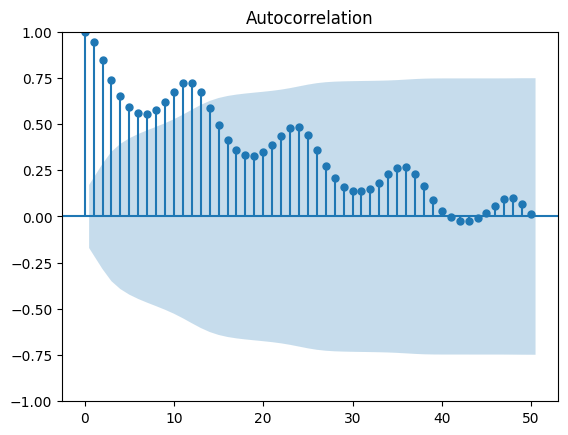

In [5]:
co2=co2[-132:]

plot_acf(co2.value, lags=50)
plt.show()

Berdasarkan plot deret sebelumnya diketahui bahwa perilaku deret berulang setiap tahun, atau dikatakan bahwa deret memiliki periode musiman bulanan, sehingga $s=12$. Perhatikan nilai fungsi autokorelasi pada lag-lag musiman (lag 12, 24, 36,...) dalam plot ACF contoh di atas. Tampak bahwa nilai autokorelasi pada lag-lag tersebut memiliki hubungan yang kuat. Bagaimanapun juga, plot ACF contoh meluruh secara perlahan dan membentuk pola gelombang kosinus teredam, yang menandakan ketidakstasioneran (plot deret juga menunjukkan adanya trend naik dalam deret).

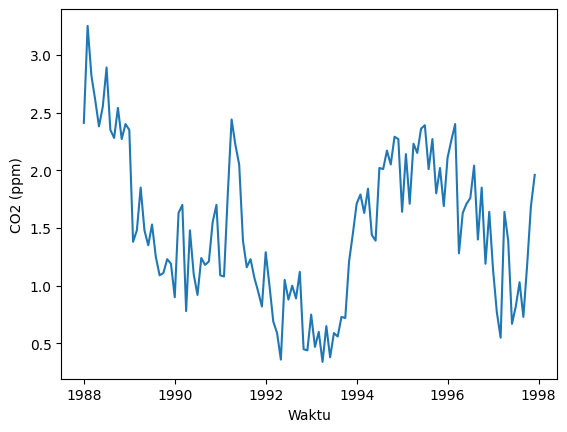

In [6]:
plt.plot(co2.time, co2.value.diff(12))
plt.xlabel('Waktu'), plt.ylabel('CO2 (ppm)')
plt.show()

Plot deret waktu untuk konsentrasi karbon dioksida setelah dilakukan pembedaan satu kali terhadap komponen musiman menunjukkan deret yang sudah terbebas dari efek musiman. Namun, masih terlihat bahwa deret masih belum stasioner secara umum

In [7]:
from statsmodels.tsa.stattools import adfuller

adfuller(co2.value.diff(12).dropna(), autolag='AIC')[1]

0.07370747642004417

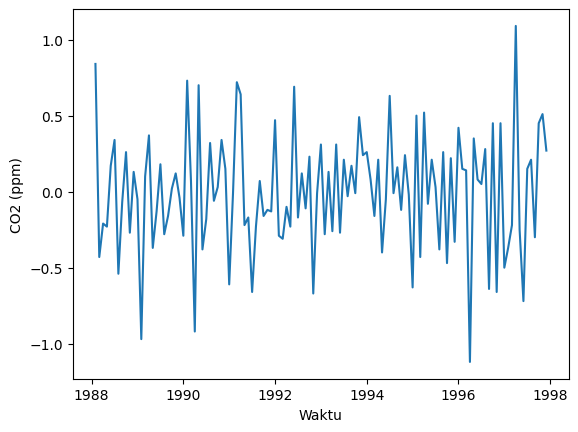

In [8]:
plt.plot(co2.time, co2.value.diff(12).diff())
plt.xlabel('Waktu'), plt.ylabel('CO2 (ppm)')
plt.show()

Setelah pembedaan musiman dan pembedaan non-musiman tampak bahwa deret sudah tidak memiliki kecenderungan apapun. Selanjutnya penentuan order $p,q$ dan $P,Q$ dapat dilakukan menggunakan plot ACF dan PACF contoh dari deret hasil pembedaan musiman dan pembedaan non-musiman tersebut.

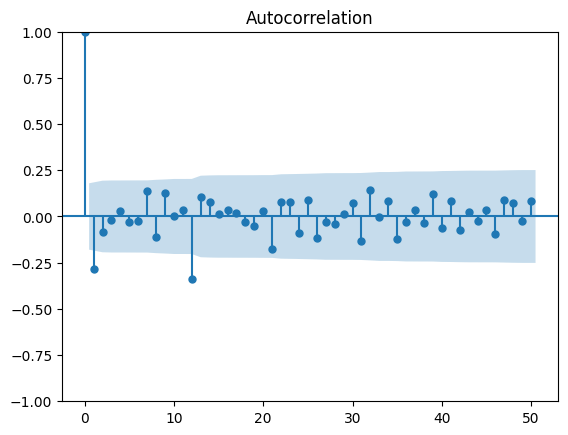

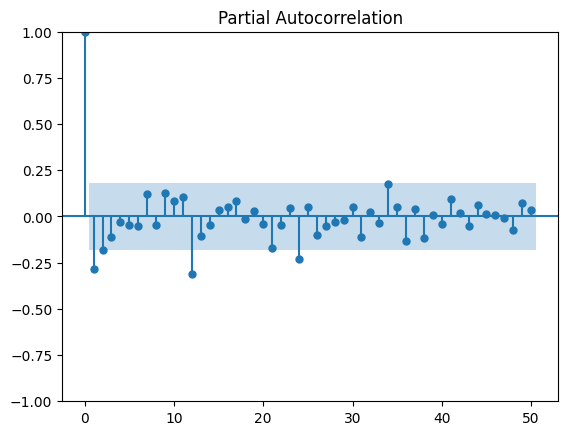

In [9]:
plot_acf(co2.value.diff(12).diff().dropna(), lags=50)
plot_pacf(co2.value.diff(12).diff().dropna(), lags=50,method='ywm')
plt.show()

Berdasarkan plot ACF contoh lag 1 signifikan sehingga dipilih order $q=1$, dan lag 12 adalah satu-satunya lag musiman yang signifikan sehingga order $Q=1$. Plot PACF contoh menunjukkan lag 1, 12, dan 24 signifikan, sehingga terdapat komponen autoregressive dalam deret atau $p=1$, dan komponen musiman $P=2$. Model musiman tentatif yang dapat dipilih untuk deret konsentrasi karbon dioksida adalah $SARIMA (0,1,1)\times(0,1,1)_{12}$, $SARIMA (1,1,0)\times(2,1,0)_{12}$, $SARIMA (1,1,1)\times(2,1,1)_{12}$. Ingat kembali bahwa model yang digunakan bersifat tentatif dan dapat berubah saat diagnostik model (Model tentatif lain bisa diidentifikasi lebih jauh menggunakan EACF)

In [10]:
arima_seasonal1=ARIMA(co2.value,order=(0,1,1),
                     seasonal_order=(0,1,1,12)).fit()

arima_seasonal2=ARIMA(co2.value,order=(1,1,0),
                     seasonal_order=(2,1,0,12)).fit()

arima_seasonal3=ARIMA(co2.value,order=(1,1,1),
                     seasonal_order=(2,1,1,12)).fit()

In [11]:
print('AIC Model 1:', arima_seasonal1.aic)
print('AIC Model 2:', arima_seasonal2.aic)
print('AIC Model 3:', arima_seasonal3.aic)

AIC Model 1: 67.24838431939384
AIC Model 2: 84.90377992199905
AIC Model 3: 70.9581524985129


In [12]:
print(arima_seasonal1.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            value   No. Observations:                  132
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -30.624
Date:                          Thu, 08 May 2025   AIC                             67.248
Time:                                  03:42:21   BIC                             75.586
Sample:                                       0   HQIC                            70.634
                                          - 132                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3326      0.096     -3.455      0.001      -0.521      -0.144
ma.S.L12      -0.9925      2.904     -0.342      0.

Diperoleh hasil pendugaan koefisien $\theta=0.3323$ dan $\Theta=0.9895$. Perhatikan bahwa pendugaan koefisien untuk komponen musiman pada model ini secara statistik tidak berbeda dengan nol. (Dapat dicobakan model lain sehingga diperoleh model yang terbaik.)

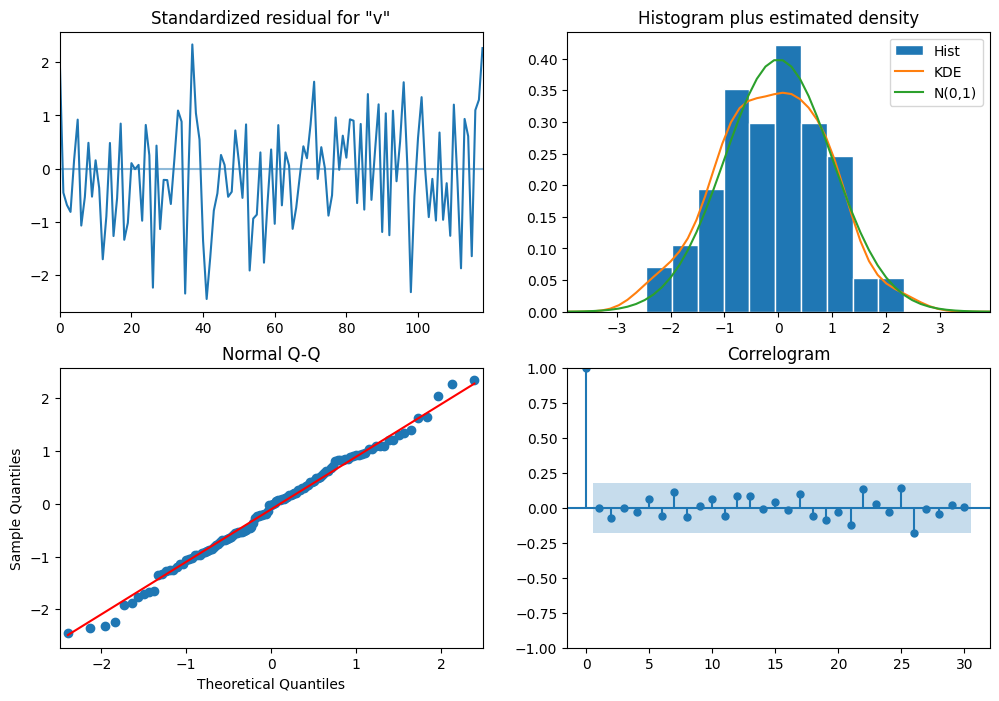

In [13]:
arima_seasonal1.plot_diagnostics(figsize=(12,8), lags=30)
plt.show()

In [14]:
arima_seasonal1.test_heteroskedasticity('breakvar')[0][1]

0.7366961882836179

In [15]:
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(arima_seasonal1.resid, correction=False)[1]

0.06417195300742828

In [16]:
from scipy.stats import shapiro
shapiro(arima_seasonal1.resid)[1]

1.1441970885295247e-24

Uji asumsi kehomogenan ragam sisaan dan kebebasan sisaan menunjukkan p-value yang lebih besar dari 0.05, sehingga asumsi terpenuhi.

Selanjutnya model yang sudah dipaskan digunakan untuk peramalan.

In [17]:
prediksi=arima_seasonal1.get_forecast(24).summary_frame(alpha=0.05)

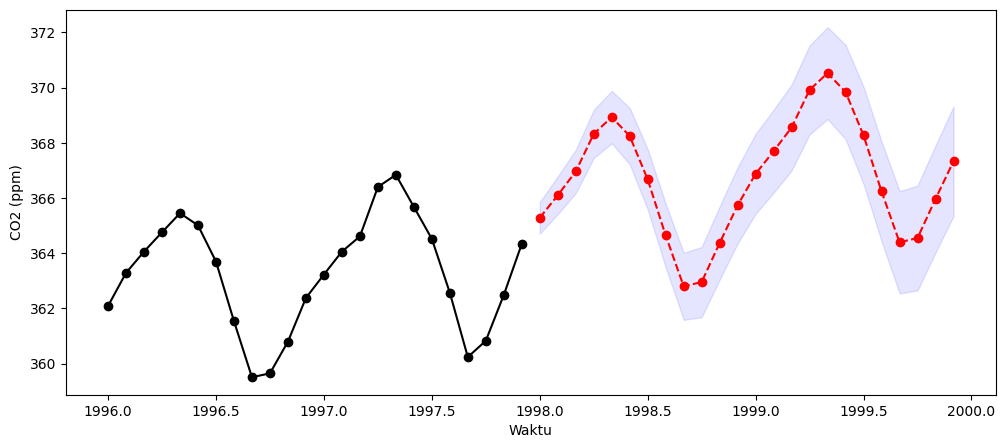

In [18]:
prediksi['time']=np.linspace(1998,2000,25)[:24]
plt.figure(figsize=(12,5))
plt.plot(co2.time[-24:],co2.value[-24:],'-ok')
plt.plot(prediksi.time,prediksi['mean'],'--or')
plt.fill_between(prediksi.time, prediksi['mean_ci_lower'],
                 prediksi['mean_ci_upper'], color='b', alpha=.1)
plt.xlabel('Waktu'), plt.ylabel('CO2 (ppm)')
plt.show()

Hasil peramalan mengikuti pola periodisitas deret dengan cukup baik. Selain itu perhatikan batas peramalan yang semakin melebar seiring meningkatnya waktu peramalan.

# AUTO-ARIMA

 **In the basic ARIMA modeling, we need to provide the p, d, and q values**. We use statistical techniques to generate these values by performing the differencing to eliminate the non-stationarity and plotting ACF and PACF graphs. Generally, the procedures of fitting an ARIMA model are as follows:

 1. Plot the data and identify any unusual observations.

 2. If necessary, transform the data (using a Box-Cox transformation) to stabilise the variance.

 3. If the data are non-stationary, take first differences of the data until the data are stationary.

 4. Examine the sample ACF and PACF of the differentiated data to determine the p and q values

 5. Try your chosen model(s) using the original data, and use the AIC to search for a better model.

 6. Check the residuals from your chosen model


 **In Auto ARIMA, the model itself will generate the optimal p, d, and q values** which would be suitable for the data to provide better forecasting.

 For illustration of Auto ARIMA, we use the real data: Global Annual Mean Surface Air Temperature Changes Series from 1880 to 1985. It is global and hemispheric
 anomalies data.

In [19]:
url='https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land/ann/2/1850-2022/data.csv'

In [20]:
climate = pd.read_csv(url, skiprows=4)

In [21]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     173 non-null    int64  
 1   Anomaly  173 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [22]:
climate1=climate.set_index('Year')
climate1

,Anomaly
Year,
1850,-0.49
1851,-0.30
1852,-0.24
1853,-0.36
1854,-0.17
...,...
2018,1.35
2019,1.53
2020,1.67


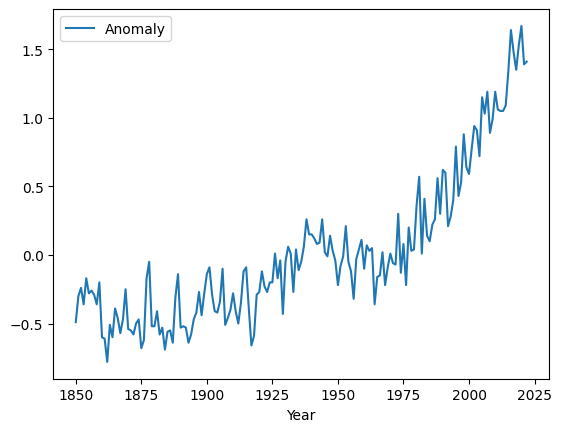

In [23]:
climate1.plot()
plt.show()

In [24]:
climate_sliced = climate1.loc[1880:1985]

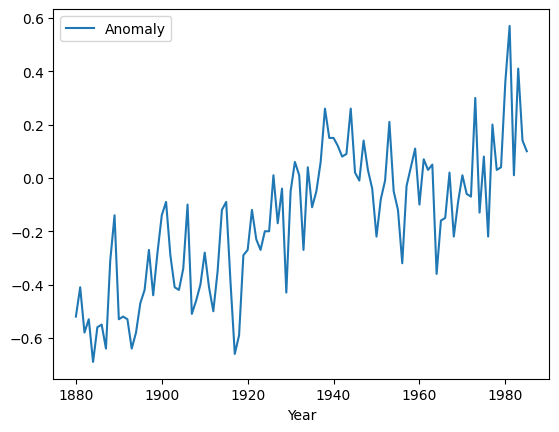

In [25]:
climate_sliced.plot()
plt.show()

Based on the time series plot above, it shows that the data is non-stationary. It can be checked by the AdFuller test.

In [26]:
from statsmodels.tsa.stattools import adfuller

adfuller(climate_sliced, autolag='AIC')[1]

0.3996232820503878

 We fit an auto ARIMA model to this data using auto_arima function from pmdarima package.

In [27]:
from pmdarima import auto_arima

 In the auto_arima function we need to provide lower and upper bounds for the p, d, and q values. Since the data does not contain a seasonal component, the
 seasonal argument is set as `False` .

In [28]:
arima_model=auto_arima(climate_sliced,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=False,
                       stepwise=True,
                       seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-38.901, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-54.834, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-73.177, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-40.807, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-73.593, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-71.603, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-71.525, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-73.320, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56.177, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-72.065, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.629 seconds


According to the `auto_arima` result, ARIMA (1,1,1) is the best model for the data.

In [29]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  106
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  40.796
Date:                Thu, 08 May 2025   AIC                            -73.593
Time:                        03:42:35   BIC                            -62.977
Sample:                             0   HQIC                           -69.291
                                - 106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0055      0.003      2.058      0.040       0.000       0.011
ar.L1          0.1976      0.116      1.706      0.088      -0.029       0.425
ma.L1         -0.8567      0.078    -11.036      0.0

As the model above is an optimal model, all assumptions required in model are fulfilled. To ensure that there is no violation in the assumptions, we can perform a diagnostic check.

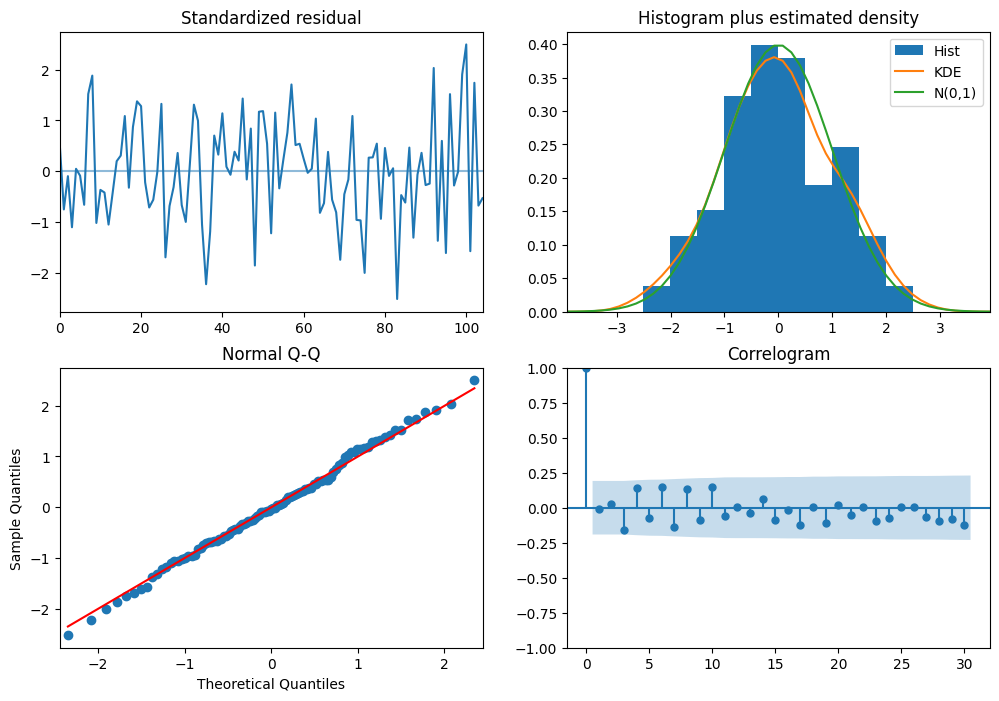

In [30]:
 arima_model.plot_diagnostics(figsize=(12,8), lags=30)
 plt.show()

In [31]:
def exog(col):
  s = []
  for i in col:
    s.append([1,i])
  return (s)

In [32]:
 from statsmodels.stats.diagnostic import het_breuschpagan
 het_breuschpagan(arima_model.resid(),exog(climate_sliced['Anomaly']))[1]

0.7806919554278511

In [33]:
 from statsmodels.sandbox.stats.runs import runstest_1samp
 runstest_1samp(arima_model.resid(), correction=False)[1]

0.8452450943716675

In [34]:
from scipy.stats import shapiro
shapiro(arima_model.resid())[1]

0.9574882956171272

All tests (homogeneity, independence, and normality of residuals) provide high p-values.

Then, we can use the model to predict future values.

In [35]:
prediksi, conf_int= arima_model.predict(20,return_conf_int=True,alpha=0.05)

In [36]:
prediksi.index=range(climate_sliced.index[-1]+1, climate_sliced.index[-1]+1+len(prediksi))

In [37]:
conf_int=pd.DataFrame(conf_int, columns=['lower','upper']).set_index(prediksi.index)

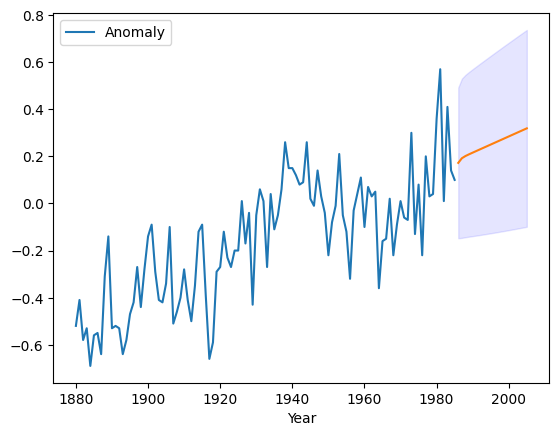

In [38]:
climate_sliced.plot()
prediksi.plot()
plt.fill_between(prediksi.index, conf_int['lower'], conf_int['upper'], color='b', alpha=.1)
plt.show()

Next, auto_arima can be used for seasonal data. In this part, we will demonstrate how to utilize auto_arima function to fit the previous dataset, which is CO2 dataset.

In [39]:
sarima_model = auto_arima(co2.value,
                          seasonal=True,
                          m=12,              # period musiman
                          trace=True,        # cetak log
                          error_action='ignore',
                          suppress_warnings=False,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=5.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=238.825, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=97.684, Time=0.58 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=461.041, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=109.426, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=91.468, Time=1.86 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=230.611, Time=1.20 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=86.891, Time=4.13 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=91.281, Time=0.90 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=86.471, Time=3.16 

In [40]:
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                 -36.329
Date:                             Thu, 08 May 2025   AIC                             84.659
Time:                                     03:44:02   BIC                            101.384
Sample:                                          0   HQIC                            91.451
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1170      0.092      1.275      0.202      -0.063       0.297
ar.L1          0.9592      

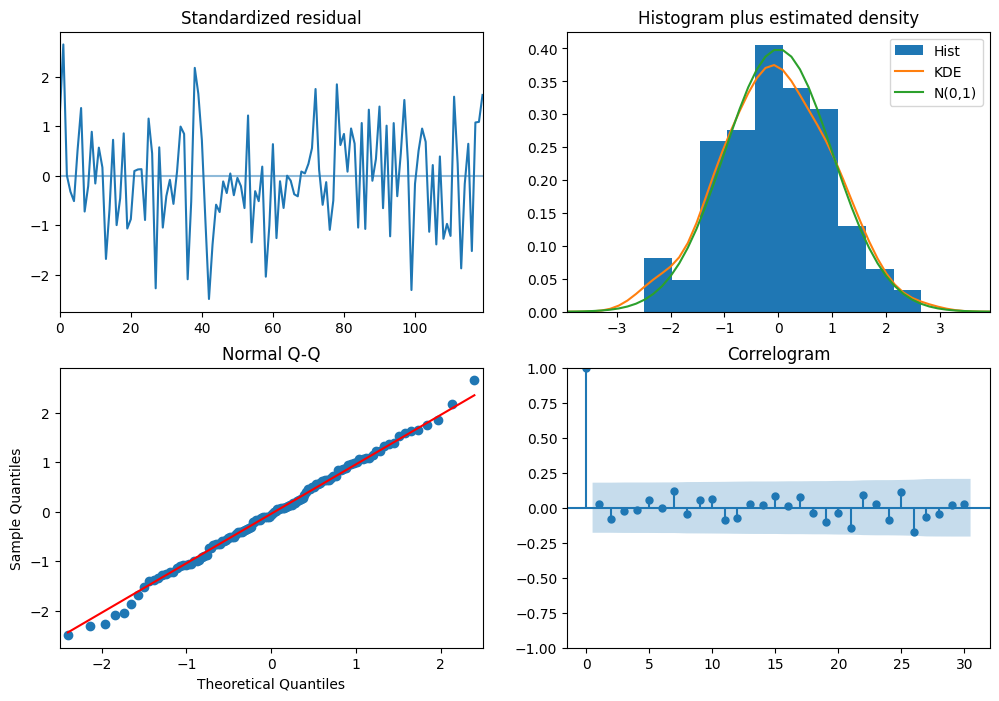

In [41]:
 sarima_model.plot_diagnostics(figsize=(12,8), lags=30)
 plt.show()

In [42]:
prediksi_seasonal, conf_int_seasonal= sarima_model.predict(24,return_conf_int=True,alpha=0.05)

In [43]:
conf_int_seasonal=pd.DataFrame(conf_int_seasonal, columns=['lower','upper']).set_index(prediksi_seasonal.index)

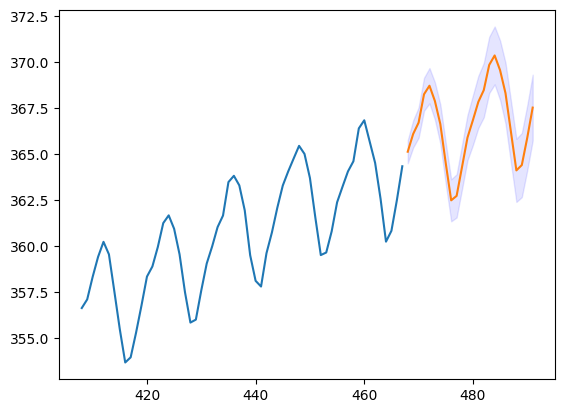

In [44]:
co2.value[-60:].plot()
prediksi_seasonal.plot()
plt.fill_between(prediksi_seasonal.index, conf_int_seasonal['lower'], conf_int_seasonal['upper'], color='b', alpha=.1)
plt.show()

**NOTE**

**In the ilustrations above, the outcomes from auto_arima appear promising. Nevertheless, it's important to remember that auto_arima does not always yield optimal results. Therefore, manual identification remains necessary.**

<center><font size='4'> TERIMAKASIH </font></center><center>_LNAM_ </center>